# Implementasi VSM TF-IDF menggunakan Klasifikasi Logistic Regression

## Logistic Regression

Rumus Logistic Regression

!['formula.png'](https://d1.awsstatic.com/sigmoid.bfc853980146c5868a496eafea4fb79907675f44.png)

!['grafik.png'](https://d1.awsstatic.com/S-curve.36de3c694cafe97ef4e391ed26a5cb0b357f6316.png)

Fungsi logistic yang hanya mengembalikan nilai antara 0 dan 1 uuntuk variabel dependen.
<hr>

Regresi logistik adalah teknik analisis data yang berguna untuk menemukan hubungan antara dua faktor data. Kemudian menggunakan hubungan ini untuk memprediksi nilai dari salah satu faktor tersebut berdasarkan faktor yang lain. Prediksi biasanya memiliki jumlah hasil yang terbatas, seperti ya atau tidak.

## Proses Implementasi Logistic Regression

### Import library/tools yang dibutuhkan

In [1]:
# Library untuk data manipulation & visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Library untuk model & evaluasi
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Library untuk save model
import pickle

* **pandas** digunakan untuk membuat dataframe agar mudah dibaca.
* **matplotlib** & **seaborn** digunakan untuk visualisasi grafik.
* **preprocessing** untuk melakukan proses label encoding.
* **train_test_split** digunakan untuk memisahkan atau membagi data menjadi test dan training.
* **LogisticRegression** digunakan untuk proses modelling logistic regression.
* **classification_report** & **confusion_matrix** digunakan untuk melihat hasil evaluasi atau laporan setelah proses modelling.
* **pickle** unutk menyimpan model.

### Load dataset VSM TF-IDF

In [2]:
data = pd.read_csv('../tugas2/data_vsm.csv')
data

,Kategori Berita,aa,abah,abai,abar,abasuki,abbas,abdelmadjid,abdullah,abdulrahman,...,zaman,zat,zelenskiy,zelensky,ziarah,zimbabwe,zimbabweakan,zimparks,zionis,zona
0,Nasional,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.043998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Internasional,0.0,0.000000,0.0,0.0,0.0,0.0,0.052613,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048279,0.0
2,Internasional,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Nasional,0.0,0.226969,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Internasional,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Nasional,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
96,Internasional,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
97,Internasional,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
98,Nasional,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Encoding label dataset

In [3]:
label_encoder = preprocessing.LabelEncoder()

# Encode Train Kategori Berita
data['Kategori Berita'] = label_encoder.fit_transform(data['Kategori Berita'])


Melakukan proses encoding pada dataset, yaitu pada kolom **Kategori Berita**. Pada kolom tersebut merupakan data target yang nantinya akan diproses, data tersebut merupkan data kategorikal kemudian dirubah menjadi numerik agar bisa diproses dalam model logistic Regression.

Hasil Encoding:
* Nasional = 1
* Internasional = 0

In [4]:
data.head()

,Kategori Berita,aa,abah,abai,abar,abasuki,abbas,abdelmadjid,abdullah,abdulrahman,...,zaman,zat,zelenskiy,zelensky,ziarah,zimbabwe,zimbabweakan,zimparks,zionis,zona
0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.043998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.052613,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048279,0.0
2,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1,0.0,0.226969,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Split dataset (train & test)

In [5]:
X = data.drop(['Kategori Berita'], axis=1)
y = data['Kategori Berita']

Memisahkan antara data train dan target.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Membagi data menjadi data train dan test dengan perbandingan 80:20, kemudian data diacak, agar bisa diproses.

In [7]:
X_test

,aa,abah,abai,abar,abasuki,abbas,abdelmadjid,abdullah,abdulrahman,abdussalam,...,zaman,zat,zelenskiy,zelensky,ziarah,zimbabwe,zimbabweakan,zimparks,zionis,zona
83,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
30,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
56,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
24,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
16,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
23,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
27,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
28,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
13,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.149781,0.000000,0.0,0.0,0.0,0.0,0.0


### Modelling dataset

#### Training

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Membuat model dengan menggunakan data yang sudah displit sebelumnya.

#### Testing

In [9]:
# Make predictions
y_pred = model.predict(X_test)

Memprediksi atau testing model yang sudah dibuat dengan data test.

In [10]:
a = pd.DataFrame({'Data ori':y_test, 'Data tebak':y_pred})
a

,Data ori,Data tebak
83,1,0
30,1,1
56,0,0
24,1,1
16,1,1
23,1,1
2,0,0
27,0,0
28,1,1
13,0,0


Pada tabel diatas terlihat bahwa hasil yang diprediksi apakah sesuai dengan data asli.

### Evaluasi Model

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20



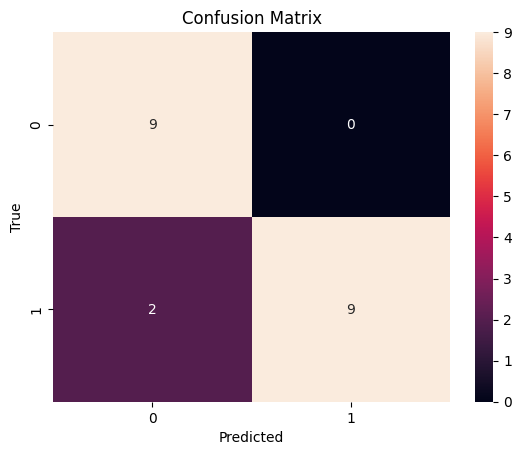

In [11]:
#Confusion matrix and classification report
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

Melakukan evaluasi pada model menggunakan **confusion_matrix** dan **classification_report**, dari hasil tersebut didapat bahwa test pada 20 data terdapat 2 data yang salah diprediksi atau ditebak. Kemudian dari hasil tersbut juga didapat akurasi dari model sebesar **90%**

### Save Model

In [12]:
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Menyimpan model Logistic Regression yang sudah dibuat, untuk nantinya bisa digunakan kembali